In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [2]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250521\2.5 V\Background\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))

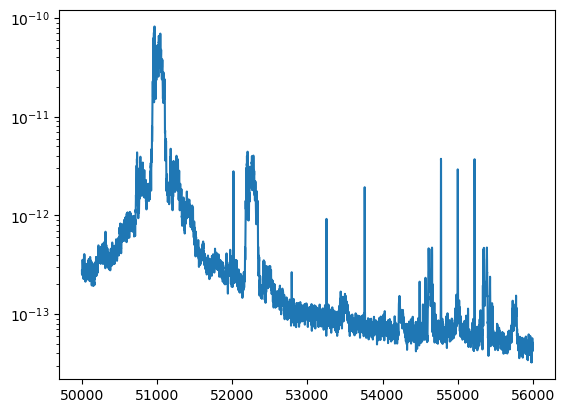

In [4]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
lb = 50000
ub = 56000
plt.plot(PSD[0][lb:ub], np.sqrt(PSD[1][lb:ub]*cal))
plt.yscale('log')

In [13]:
freqs = [5500]

path = r'D:\Lab Data\lorentz_force\sphere20250507\20250521\2.5 V\Background\tt'
files = np.linspace(0, 5999, 6000, dtype = int)
end = '.hdf5'
phases2 = np.zeros((len(freqs), len(files)*100))
amps2 = np.zeros((len(freqs), len(files)*100))
cfs2 = np.zeros((len(freqs), len(files)*100))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(100):
        drive = data['channel_f'][i*10**5:(i+1)*10**5]
        drive2 = data['channel_d'][i*10**5:(i+1)*10**5]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for m, freq in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
            amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
            cf = np.argmax(np.abs(fft_drive2[4000:6000])) + 4000
            amps2[m, 100*n+i] = amp
            phases2[m, 100*n+i] = phase[1]
            cfs2[m, 100*n+i] = cf

In [30]:
data_dict = {'amps': amps2, 'phases': phases2, 'cfs': cfs2}
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Background250521.hdf5'
au.save_data_hdf5(filename, data_dict)

In [4]:
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Background250521.hdf5'
data = au.load_data_hdf52(filename)

In [17]:
cal3 = 3.1825020700030454e-10*40

In [6]:
amps2 = data['amps']
phases2 = data['phases']
cfs2 = data['cfs']

In [18]:
print(np.mean(amps2[0][0:10])*cal3)

2.417281538848427e-12


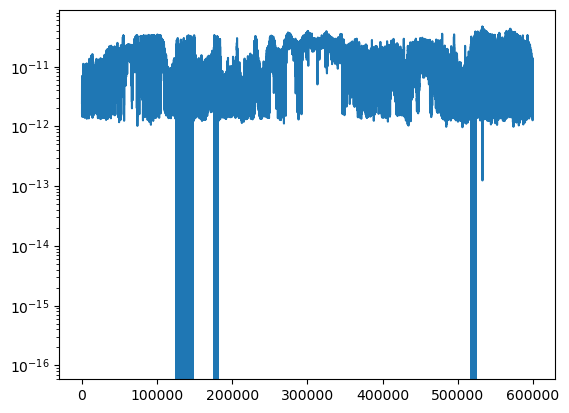

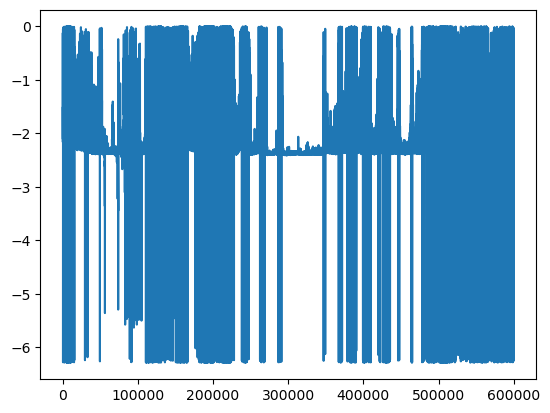

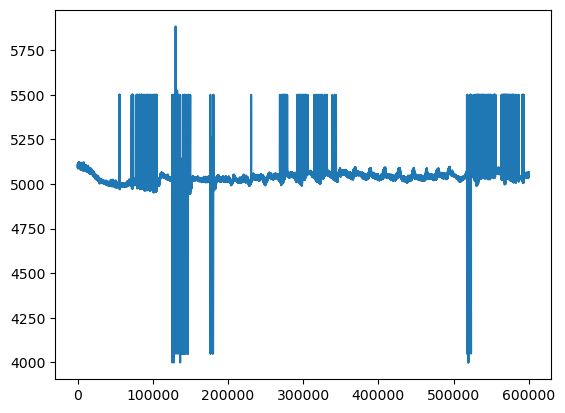

In [19]:
plt.plot(amps2[0]*cal3)
plt.yscale('log')
plt.figure()
plt.plot(phases2[0])
plt.figure()
plt.plot(cfs2[0])

In [233]:
num_avrs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]#, 20, 30, 40, 50, 60, 70, 80, 90, 100]#, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000]
devs = []
devs_err = []
lb = 200000
ub = 200100
for na in num_avrs:
    samples = np.zeros(int(len(amps2[0][lb:ub])/na))
    for m, i in enumerate(range(int(len(amps2[0][lb:ub])/na))):
        samples[m] = np.mean(amps2[0][i*na:(i+1)*na]*cal3)
    devs.append(np.sqrt(abs((1/(len(samples/na-1)))*sum((samples[1:]-samples[:-1])**2)/2)))
    devs_err.append(np.sqrt(np.sqrt(0.5*np.var((samples[1:]-samples[:-1])**2)))/np.sqrt(len(samples)-1))

Text(0, 0.5, 'Allan deviation (m/$\\sqrt{Hz}$)')

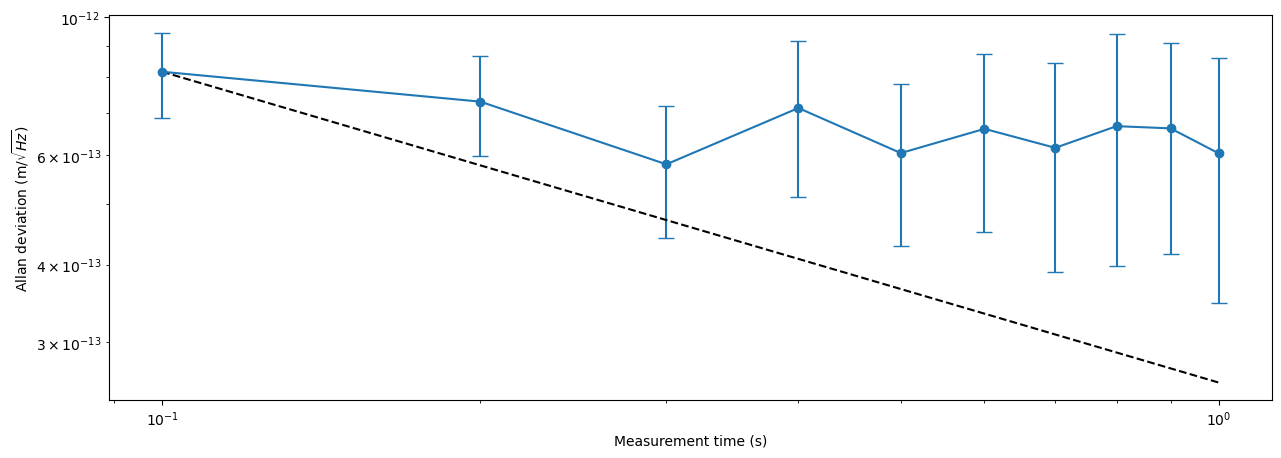

In [234]:
plt.figure(figsize = (15, 5))
plt.errorbar(np.array(num_avrs)/10, np.array(devs)*np.sqrt(10), yerr = np.array(devs_err)*np.sqrt(10), marker = 'o', capsize = 6)
plt.plot(np.array(num_avrs[:11])/10, devs[0]*np.sqrt(10)/np.sqrt(np.array(num_avrs[:11])), 'k--')
#plt.plot(np.array(num_avrs)/10, np.sqrt(20/np.array(num_avrs)))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Measurement time (s)')
plt.ylabel('Allan deviation (m/$\sqrt{Hz}$)')

(49800.0, 51000.0)

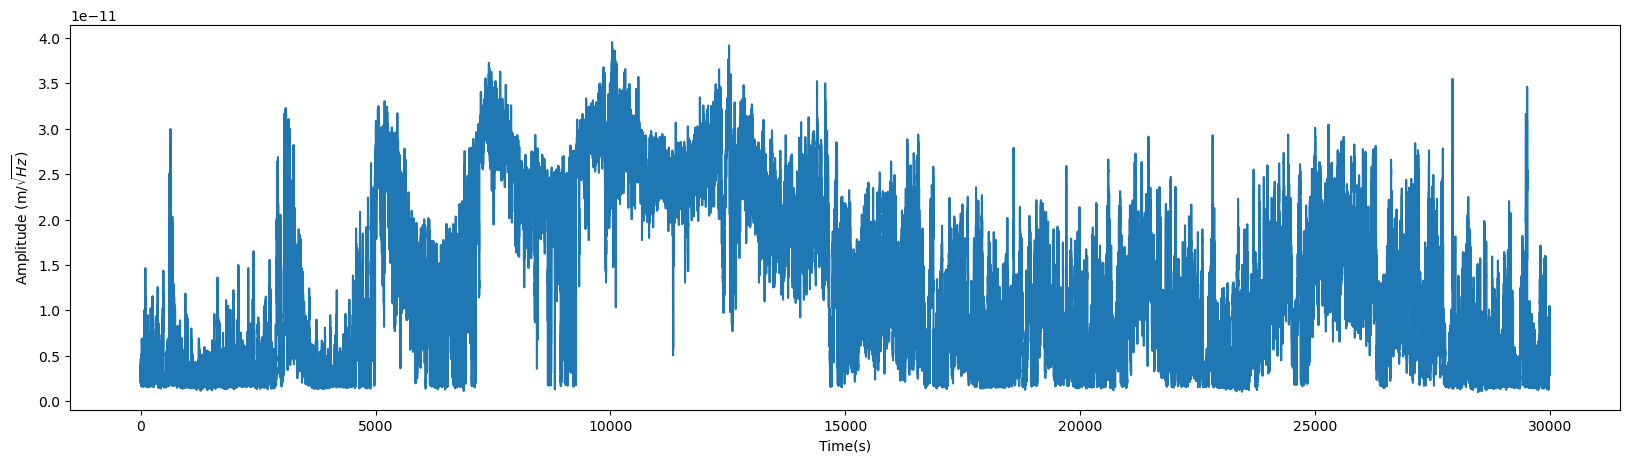

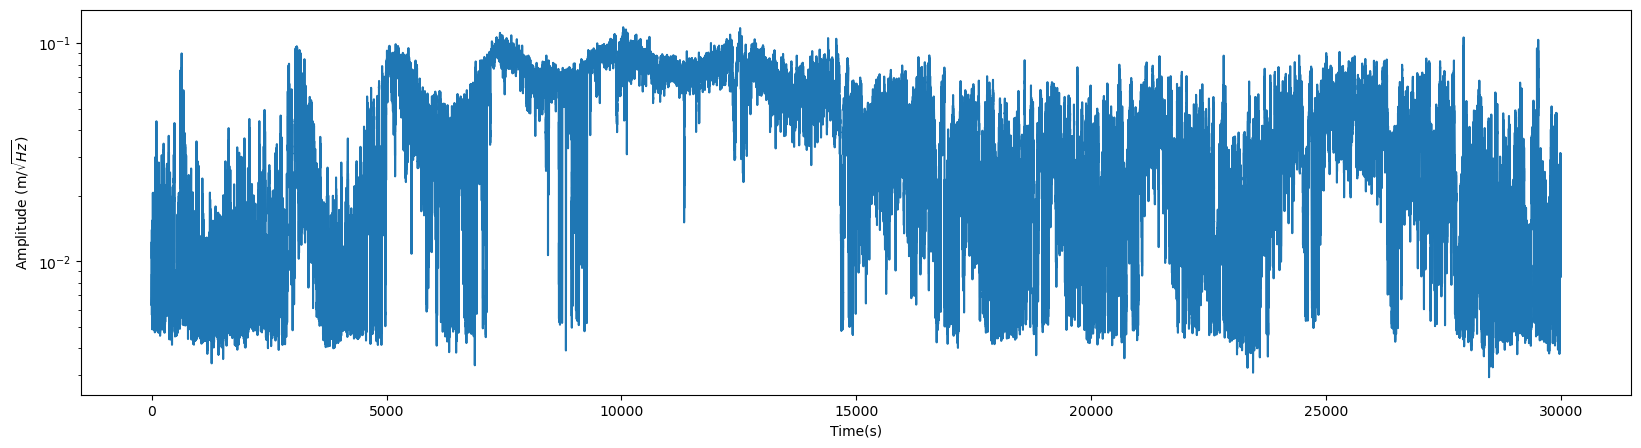

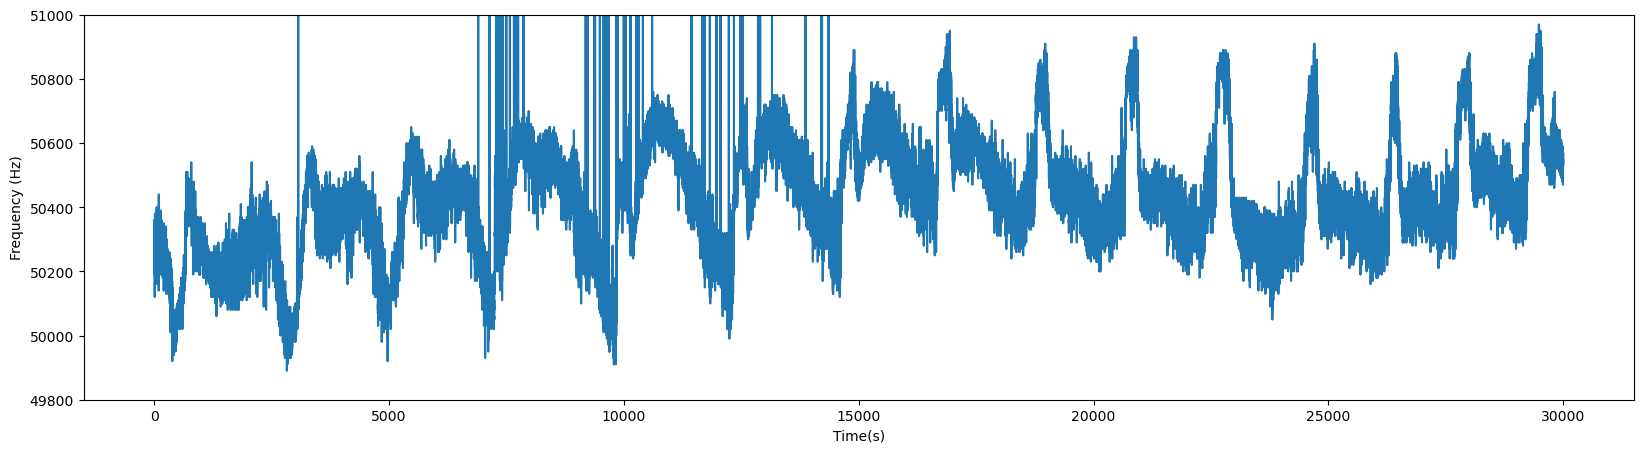

In [193]:
plt.figure(figsize = (20, 5))
plt.plot(np.linspace(0, 30000, 300000), amps2[0][200000:500000]*cal3)
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')
plt.xlabel('Time(s)')
#plt.yscale('log')
plt.figure(figsize = (20, 5))
plt.plot(np.linspace(0, 30000, 300000), abs(amps2[0][200000:500000]*cal3*(cfs2[0][200000:500000]**2-55001**2)))
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')
plt.xlabel('Time(s)')
plt.yscale('log')
plt.figure(figsize = (20, 5))
plt.plot(np.linspace(0, 30000, 300000), 10*cfs2[0][200000:500000])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time(s)')
plt.ylim(49800, 51000)

In [192]:
print((50300**2-55000**2)/(49900**2-55000**2))

0.9250827118263892


In [161]:
tester = np.random.normal(size = 70000)+au.butter_lowpass_filter(100*np.random.normal(size = 70000), 0.1, 100, order = 3)
tester = tester[10000:]

Text(0.5, 0, 'Time (s)')

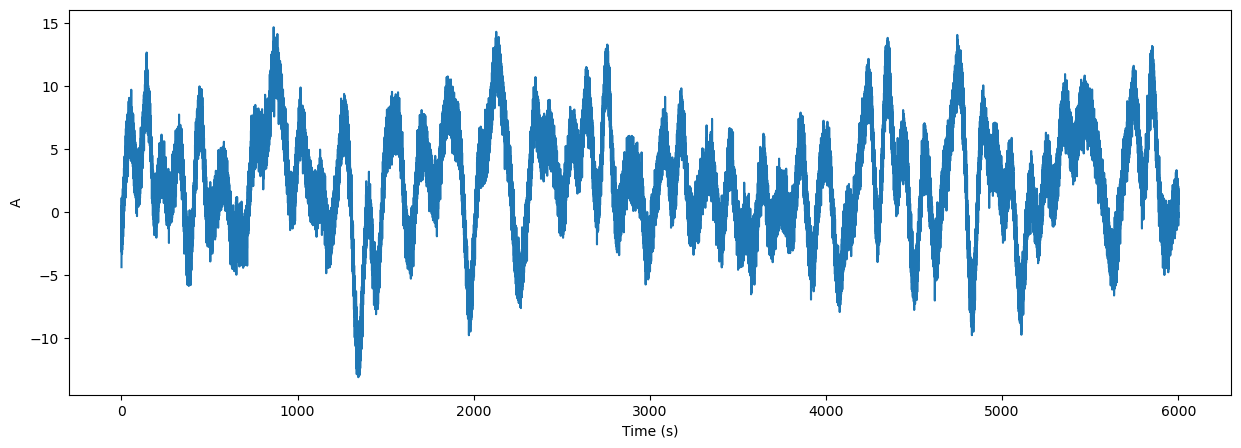

In [166]:
plt.figure(figsize = (15, 5))
plt.plot(np.linspace(0, 6000, 60000), tester+3)
plt.ylabel('A')
plt.xlabel('Time (s)')

In [163]:
num_avrs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
devs = []
devs_err = []
for na in num_avrs:
    samples = np.zeros(int(len(tester)/na))
    print(len(samples))
    for m, i in enumerate(range(int(len(tester)/na))):
        samples[m] = np.mean(tester[i*na:(i+1)*na])
    devs.append(np.sqrt(abs((1/(len(samples/na-1)))*sum((samples[1:]-samples[:-1])**2)/2)))
    devs_err.append(np.sqrt(np.sqrt(0.5*np.var((samples[1:]-samples[:-1])**2)))/np.sqrt(len(samples)-1))

60000
30000
20000
15000
12000
10000
8571
7500
6666
6000
3000
2000
1500
1200
1000
857
750
666
600
300
200
150
120
100
85
75
66
60
30
20
15
12
10
8
7
6
6


Text(0, 0.5, 'Allan deviation')

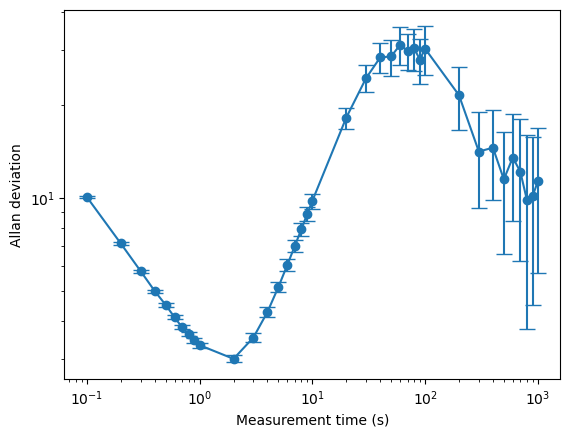

In [164]:
plt.errorbar(np.array(num_avrs)/10, np.array(devs)*10, yerr = np.array(devs_err)*10, marker = 'o', capsize = 6)
#plt.plot(np.array(num_avrs)/10, devs[0]*10/np.sqrt(num_avrs))
#plt.plot(np.array(num_avrs)/10, np.sqrt(20/np.array(num_avrs)))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Measurement time (s)')
plt.ylabel('Allan deviation')